In [1]:
from keras import models

Using TensorFlow backend.


In [3]:
from keras import layers

In [20]:
from keras.datasets import imdb

In [22]:
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)

## 내부의 리스트를 차원 데이터로 변형하기

In [23]:
import numpy as np

In [24]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

In [26]:
X_train = vectorize_sequences(train_data)

In [27]:
X_test = vectorize_sequences(test_data)

# 1. 모델과 레이어 지정하기

## 모델을 정의 

In [4]:
model = models.Sequential()

In [5]:
model

## 레이어 정의

In [6]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

In [7]:
model.add(layers.Dense(16, activation='relu'))

In [8]:
model.add(layers.Dense(1, activation='sigmoid'))

# 2. 모델 컴파일을 통해 백엔드 프레임워크와 일치하기

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

##  손실함수, 최적화 함수, 정확도 함수를 직접 지정하기

In [13]:
from keras import optimizers

In [15]:
from keras import losses

In [18]:
from keras import metrics

In [30]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss= losses.binary_crossentropy, metrics = [metrics.binary_accuracy ])

In [31]:
history = model.fit(X_train, train_labels, epochs=20, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 124us/step - loss: 0.0095 - binary_accuracy: 0.9976 - val_loss: 0.7685 - val_binary_accuracy: 0.8710
Epoch 2/20
20000/20000 [==============================] - 2s 114us/step - loss: 0.0047 - binary_accuracy: 0.9991 - val_loss: 0.7984 - val_binary_accuracy: 0.8708
Epoch 3/20
20000/20000 [==============================] - 2s 113us/step - loss: 0.0019 - binary_accuracy: 0.9999 - val_loss: 0.8318 - val_binary_accuracy: 0.8680
Epoch 4/20
20000/20000 [==============================] - 2s 114us/step - loss: 0.0031 - binary_accuracy: 0.9991 - val_loss: 0.8700 - val_binary_accuracy: 0.8706
Epoch 5/20
20000/20000 [==============================] - 2s 113us/step - loss: 0.0011 - binary_accuracy: 0.9999 - val_loss: 0.9125 - val_binary_accuracy: 0.8664
Epoch 6/20
20000/20000 [==============================] - 2s 113us/step - loss: 0.0032 - binary_accuracy: 0.9991 - val_loss: 0.9414 - val_bin

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(loss) + 1)

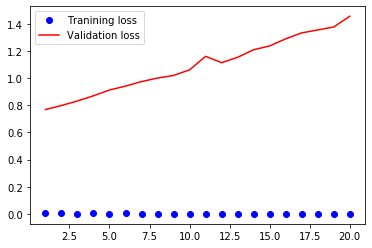

In [39]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

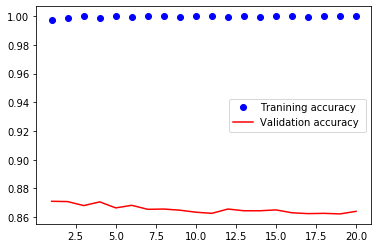

In [40]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()

In [41]:
history = model.fit(X_train, train_labels, epochs=4, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s 112us/step - loss: 0.0014 - binary_accuracy: 0.9994 - val_loss: 1.4588 - val_binary_accuracy: 0.8642
Epoch 2/4
20000/20000 [==============================] - 2s 107us/step - loss: 8.8715e-06 - binary_accuracy: 1.0000 - val_loss: 1.4628 - val_binary_accuracy: 0.8626
Epoch 3/4
20000/20000 [==============================] - 2s 108us/step - loss: 6.8041e-06 - binary_accuracy: 1.0000 - val_loss: 1.4805 - val_binary_accuracy: 0.8622
Epoch 4/4
20000/20000 [==============================] - 2s 108us/step - loss: 5.3351e-06 - binary_accuracy: 1.0000 - val_loss: 1.5123 - val_binary_accuracy: 0.8620


In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(loss) + 1)

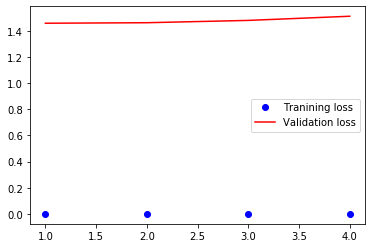

In [43]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

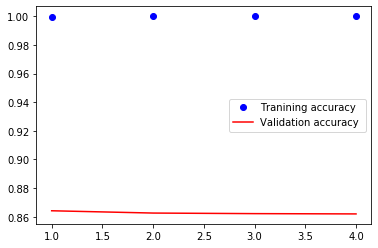

In [44]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()

In [46]:
model.predict(X_test)

array([[1.2106657e-02],
       [1.0000000e+00],
       [9.9999726e-01],
       ...,
       [2.5421381e-04],
       [4.1723251e-07],
       [1.4571396e-01]], dtype=float32)